In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.shape

(2000, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,How can I find out whom I sent a friend reques...,Can someone tell if you've been logging into t...,0
1,1,3,4,What is the one thing you will never do on Quora?,What are some things one can never regret doing?,0
2,2,5,6,"What are the characteristics of a ""Perfect Wor...",What is a real-world example of perfection?,0
3,3,7,8,What is the best path I should take to improve...,How can I improve my communication skills in E...,1
4,4,9,10,What would you do if today is last day of earth?,"If today were the last day of your life, would...",0


In [4]:
df = df.sample(2000,random_state=2)

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
278,278,556,557,What is the the best way to learn programming?,How can I learn more programming?,1
492,492,982,983,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...,0
1266,1266,2524,2525,How can I wake up early in the morning?,How do I get up early in the morning?,1
557,557,1112,1113,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...,0
871,871,1737,1738,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...,1


In [10]:
df.duplicated().sum()

0

0    1118
1     882
Name: is_duplicate, dtype: int64
0    55.9
1    44.1
Name: is_duplicate, dtype: float64


<AxesSubplot:>

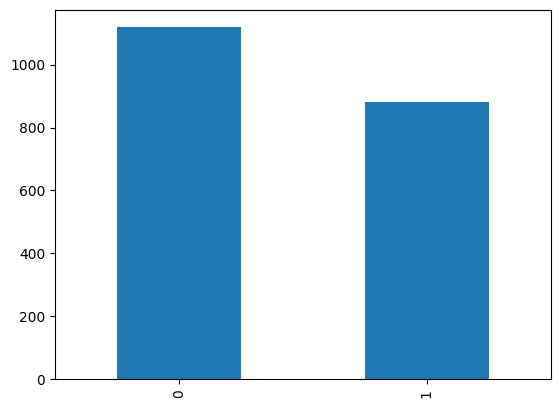

In [13]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 3978
Number of questions getting repeated 22


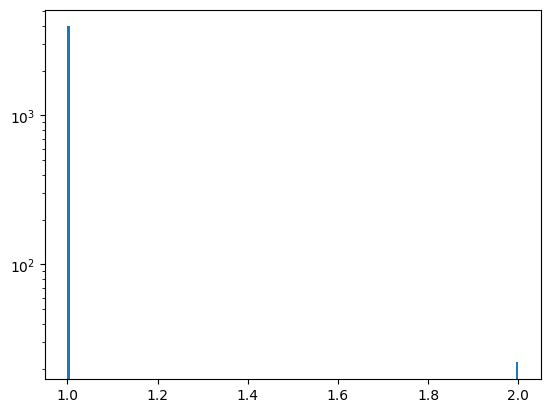

In [15]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [17]:
# Feature Engineering

df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()

In [19]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
278,278,556,557,What is the the best way to learn programming?,How can I learn more programming?,1,46,33
492,492,982,983,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...,0,93,95
1266,1266,2524,2525,How can I wake up early in the morning?,How do I get up early in the morning?,1,39,37
557,557,1112,1113,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...,0,72,63
871,871,1737,1738,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...,1,47,59


In [20]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
278,278,556,557,What is the the best way to learn programming?,How can I learn more programming?,1,46,33,9,6
492,492,982,983,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...,0,93,95,15,16
1266,1266,2524,2525,How can I wake up early in the morning?,How do I get up early in the morning?,1,39,37,9,9
557,557,1112,1113,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...,0,72,63,14,9
871,871,1737,1738,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...,1,47,59,8,10


In [21]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [25]:
list(map(lambda word: word.lower().strip(), "What is the the best way to learn programming?".split(" ")))

['what', 'is', 'the', 'the', 'best', 'way', 'to', 'learn', 'programming?']

In [28]:
set(map(lambda word: word.lower().strip(), "What is the the best way to learn programming?".split(" ")))

{'best', 'is', 'learn', 'programming?', 'the', 'to', 'way', 'what'}

In [29]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
278,278,556,557,What is the the best way to learn programming?,How can I learn more programming?,1,46,33,9,6,2
492,492,982,983,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...,0,93,95,15,16,1
1266,1266,2524,2525,How can I wake up early in the morning?,How do I get up early in the morning?,1,39,37,9,9,7
557,557,1112,1113,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...,0,72,63,14,9,1
871,871,1737,1738,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...,1,47,59,8,10,5


In [30]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [31]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
278,278,556,557,What is the the best way to learn programming?,How can I learn more programming?,1,46,33,9,6,2,14
492,492,982,983,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...,0,93,95,15,16,1,30
1266,1266,2524,2525,How can I wake up early in the morning?,How do I get up early in the morning?,1,39,37,9,9,7,18
557,557,1112,1113,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...,0,72,63,14,9,1,22
871,871,1737,1738,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...,1,47,59,8,10,5,18


In [33]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
278,278,556,557,What is the the best way to learn programming?,How can I learn more programming?,1,46,33,9,6,2,14,0.14
492,492,982,983,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...,0,93,95,15,16,1,30,0.03
1266,1266,2524,2525,How can I wake up early in the morning?,How do I get up early in the morning?,1,39,37,9,9,7,18,0.39
557,557,1112,1113,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...,0,72,63,14,9,1,22,0.05
871,871,1737,1738,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...,1,47,59,8,10,5,18,0.28


minimum characters 13
maximum characters 198
average num of characters 50


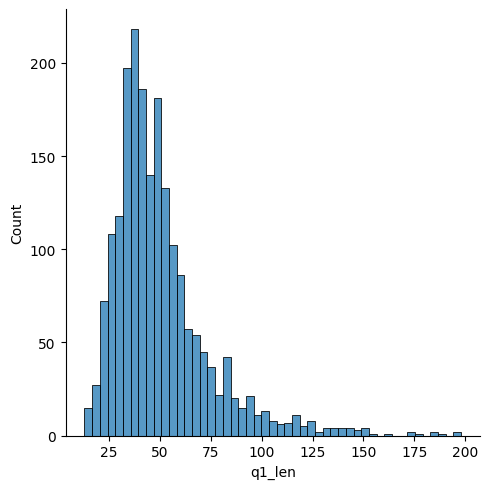

In [34]:
# Analysis of features
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))

minimum characters 12
maximum characters 484
average num of characters 51


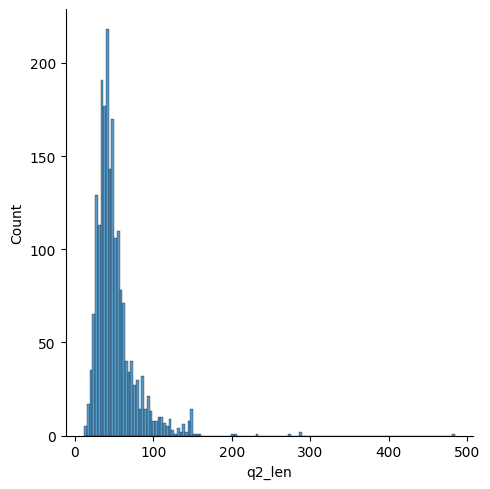

In [35]:
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

minimum words 3
maximum words 38
average num of words 9


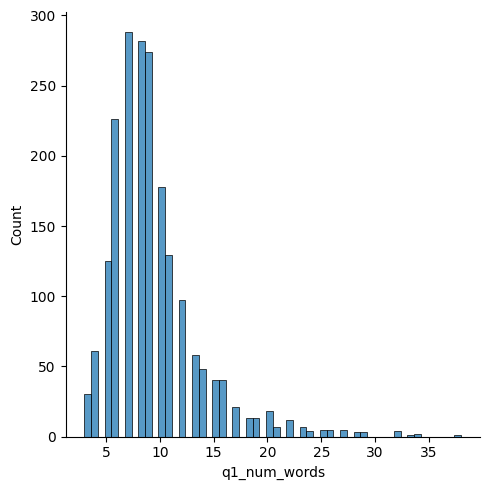

In [38]:
sns.displot(df['q1_num_words'])
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',int(df['q1_num_words'].mean()))

minimum words 3
maximum words 107
average num of words 9


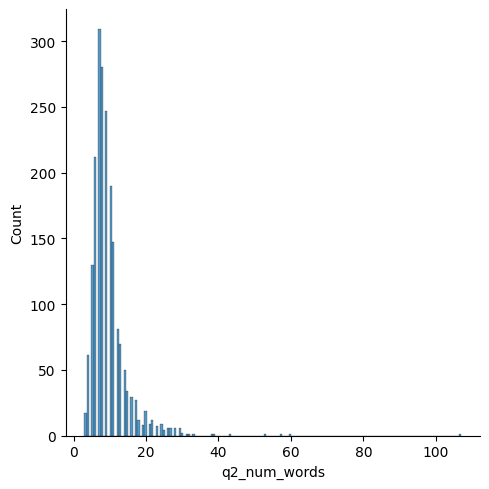

In [39]:
sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

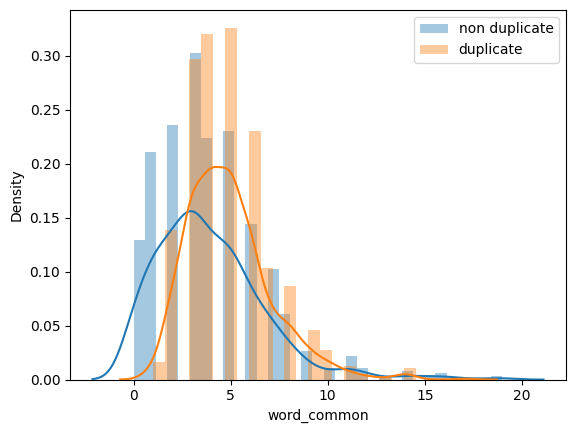

In [40]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

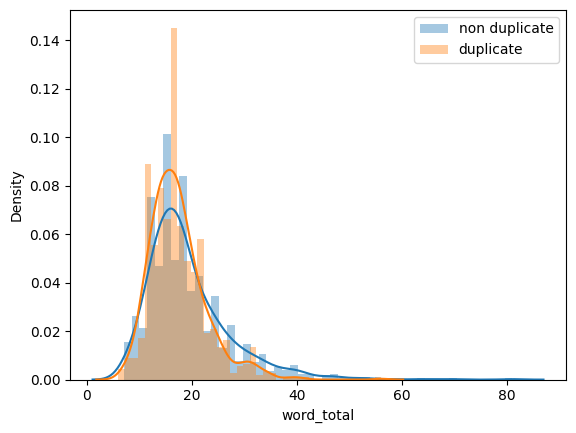

In [41]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

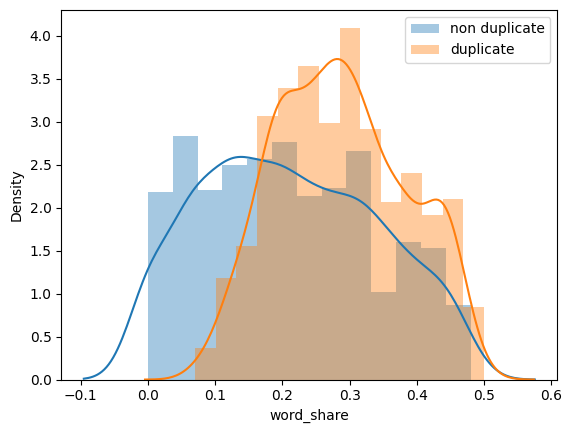

In [42]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [43]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
278,What is the the best way to learn programming?,How can I learn more programming?
492,"What does the ribbon, which looks like a colou...",Could you show us some examples of unusual loo...
1266,How can I wake up early in the morning?,How do I get up early in the morning?
557,What is really happening when I burn my plasti...,Does India have absolute advantage in manufact...
871,Who is the most beautiful actress in Hollywood?,Who are the 5 most beautiful actresses in Holl...


In [44]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(2000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
278,1,46,33,9,6,2,14,0.14
492,0,93,95,15,16,1,30,0.03
1266,1,39,37,9,9,7,18,0.39
557,0,72,63,14,9,1,22,0.05
871,1,47,59,8,10,5,18,0.28


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [46]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(2000, 6000)

In [47]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(2000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
278,1,46,33,9,6,2,14,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0
492,0,93,95,15,16,1,30,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0
1266,1,39,37,9,9,7,18,0.39,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,72,63,14,9,1,22,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
871,1,47,59,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6725

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.685